<a href="https://colab.research.google.com/github/IamSamage/GW-Signal-Analysis/blob/main/GW150917_L1_vs_H1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

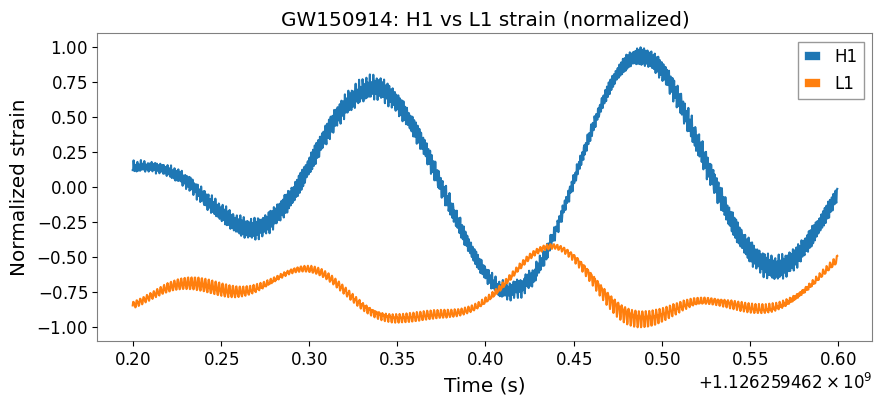


 최대 상관 시점 (time lag): 0.052246 seconds


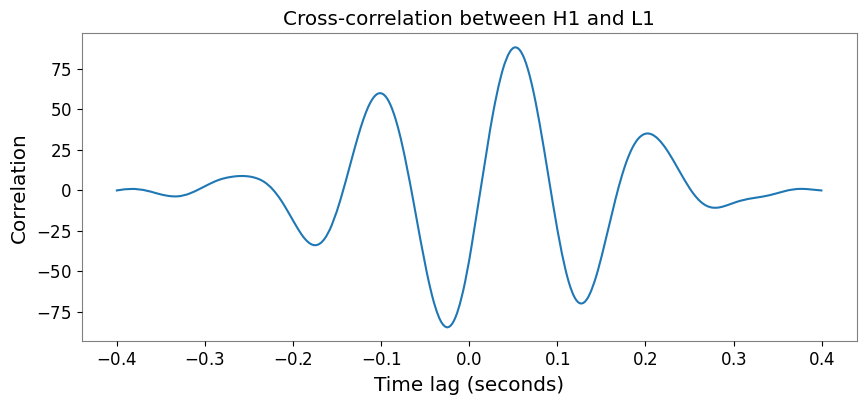

In [ ]:
!pip install gwpy --quiet
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import correlate

# 데이터 다운로드
event_time = 1126259462.4
start = event_time - 1
end = event_time + 1

strain_h1 = TimeSeries.fetch_open_data('H1', start, end, sample_rate=4096)
strain_l1 = TimeSeries.fetch_open_data('L1', start, end, sample_rate=4096)

# 이벤트 중심으로 0.4초 구간 추출
h1_seg = strain_h1.crop(event_time - 0.2, event_time + 0.2)
l1_seg = strain_l1.crop(event_time - 0.2, event_time + 0.2)

# 정규화
h1_seg = h1_seg / np.max(np.abs(h1_seg.value))
l1_seg = l1_seg / np.max(np.abs(l1_seg.value))

# 파형 시각화
plt.figure(figsize=(10, 4))
plt.plot(h1_seg.times.value, h1_seg.value, label='H1')
plt.plot(l1_seg.times.value, l1_seg.value, label='L1')
plt.legend()
plt.title("GW150914: H1 vs L1 strain (normalized)")
plt.xlabel("Time (s)")
plt.ylabel("Normalized strain")
plt.grid()
plt.show()

# Cross-correlation
l1_val = l1_seg.value - np.mean(l1_seg.value)
h1_val = h1_seg.value - np.mean(h1_seg.value)

corr = correlate(h1_val, l1_val, mode='full')
lags = np.arange(-len(h1_val)+1, len(h1_val))
dt = l1_seg.dt.value
lag_seconds = lags * dt

max_idx = np.argmax(corr)
time_delay = lag_seconds[max_idx]

print(f"\n 최대 상관 시점 (time lag): {time_delay:.6f} seconds")

plt.figure(figsize=(10, 4))
plt.plot(lag_seconds, corr)
plt.title("Cross-correlation between H1 and L1")
plt.xlabel("Time lag (seconds)")
plt.ylabel("Correlation")
plt.grid()
plt.show()
